# Intro to reading a Lis file

In [1]:
from dlisio import lis
from typing import Union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to file
path_to_file = r"C:\Users\Usuário\Downloads\7CS__0012__AL_7CS__0012__AL.tif"  

def read_lis_file(path_to_file:str) -> list[lis.LogicalFile]:
    """
    Read a LIS file and return a list of LogicalFile objects.

    Args:
        path_to_file (str): Path to the LIS file.

    Returns:
        list[lis.LogicalFile]: List of LogicalFile objects.
    """
    try:
        return lis.load(path_to_file)
    except Exception as e:
        print(e)

def parse_lis_physical_file(file:lis.PhysicalFile) -> list[lis.LogicalFile]:
    """
    Transform a LIS physical file into a list of LIS logical files.
    """
    *f, = file
    return f

def get_physical_lis_specs(physical_file:lis.LogicalFile, attrs:list[str]) -> list[dict[str, str]]:
    """
    Get the attributes of a LIS file.

    Args:
        physical_file (lis.PhysicalFile): A LIS physical file.
        attrs (list[str]): List of attributes to be extracted.

    Returns:
        _type_: _description_
    """
    result = []
    spec = get_lis_data_spec(physical_file)
    for block in spec.specs:
        for atr in attrs:
            if hasattr(block, atr):
                dict_ = {atr: getattr(block, atr).strip() if isinstance(getattr(block, atr), str) else getattr(block, atr)}
                result.append(dict_)
    return result

def get_lis_data_spec(file:lis.LogicalFile) -> Union[lis.DataFormatSpec, list[lis.DataFormatSpec]]:
    """
    Get the data specification of a LIS file.

    Args:
        file (lis.LogicalFile): A LIS file.

    Returns:
        dict: Data specification of the LIS file.
    """
    try:
        dataspec = file.data_format_specs()
        if len(dataspec) == 1:
            return dataspec[0]
        return dataspec
    
    except Exception as e:
        print(e)

# Reading the file and extracting all the logical files
and extracticng the DataFormatSpecs

In [2]:
physical_file = read_lis_file(path_to_file)
attrs =[ 'api_curve_class', 'api_curve_type', 'api_log_type', 'api_modifier', 'filenr', 'mnemonic', 'process_level', 'reprc', 'reserved_size', 'samples', 'service_id', 'service_order_nr', 'units']


get_physical_lis_specs(physical_file[2], attrs)
        


[{'api_curve_class': 0},
 {'api_curve_type': 0},
 {'api_log_type': 0},
 {'api_modifier': 0},
 {'filenr': 0},
 {'mnemonic': 'DEPT'},
 {'process_level': 0},
 {'reprc': 68},
 {'reserved_size': 4},
 {'samples': 1},
 {'service_id': ''},
 {'service_order_nr': ''},
 {'units': 'M'},
 {'api_curve_class': 0},
 {'api_curve_type': 0},
 {'api_log_type': 0},
 {'api_modifier': 0},
 {'filenr': 0},
 {'mnemonic': 'SN'},
 {'process_level': 0},
 {'reprc': 68},
 {'reserved_size': 4},
 {'samples': 1},
 {'service_id': ''},
 {'service_order_nr': ''},
 {'units': ''}]

In [4]:
def get_records_components(logical_file:lis.LogicalFile) -> list[dict]:

    records = logical_file.wellsite_data()
    file_records = list()
    for record in records:
        component = record.components()
        component_dict = {}
        for c in component:
            component_dict['mnemonic'] = c.mnemonic.strip() if isinstance(c.mnemonic, str) else c.mnemonic
            component_dict['units'] = c.units
            component_dict['component'] = c.component.strip() if isinstance(c.component, str) else c.component
        file_records.append(component_dict)
    return file_records


for logical_file in physical_file:
    print(get_records_components(logical_file))

[{'mnemonic': 'FN', 'units': '    ', 'component': 'AL-01'}, {'mnemonic': 'WN', 'units': '    ', 'component': '7CS  0012  AL'}, {'mnemonic': 'NATI', 'units': '    ', 'component': 'BRA'}, {'mnemonic': 'WBN', 'units': '    ', 'component': '7CS  0012  AL'}, {'mnemonic': 'CN', 'units': '    ', 'component': 'PETROBRAS'}, {'mnemonic': 'RIGN', 'units': '    ', 'component': 'SC92'}, {'mnemonic': 'SPUD', 'units': '    ', 'component': '1981/04/24'}, {'mnemonic': 'LATI', 'units': '    ', 'component': '-9.658840'}, {'mnemonic': 'LONG', 'units': '    ', 'component': '-35.798910'}, {'mnemonic': 'APIN', 'units': '    ', 'component': '081150188500'}, {'mnemonic': 'GEOD', 'units': '    ', 'component': 'ARATU'}, {'mnemonic': 'PBWE', 'units': '    ', 'component': 'BR-7CS  0012  AL-PETROBRAS'}, {'mnemonic': 'PBWB', 'units': '    ', 'component': '7CS  0012  AL'}, {'mnemonic': 'PBWS', 'units': '    ', 'component': 'ALL'}, {'mnemonic': 'UTZC', 'units': '    ', 'component': '25'}, {'mnemonic': 'UTME', 'units':

In [5]:
def get_curves(logical_file:lis.LogicalFile) -> pd.DataFrame:
    """
    Get the curves of a LIS file.

    Args:
        logical_file (lis.LogicalFile): A LIS file.

    Returns:
        pd.DataFrame: A DataFrame containing the curves.
    """
    try:
        format_specs = logical_file.data_format_specs()

        if len(format_specs) == 1:
            format_spec = format_specs[0]
            sample_rates = format_spec.sample_rates()
            if len(sample_rates) == 1:
                sample_rate = sample_rates
                data = lis.curves(logical_file, format_spec)
                df = pd.DataFrame(data)
                df.columns = df.columns.str.strip()
                return df
        else:
            dfs = []
            for format_spec in format_specs:
                sample_rates = format_spec.sample_rates()
                for sample_rate in sample_rates:
                    data = lis.curves(logical_file, format_spec, sample_rate)
                    df = pd.DataFrame(data)
                    df.columns = df.columns.str.strip()
                    dfs.append(df)
            return dfs
    except Exception as e:
        print(e)



In [6]:
dataframes_list = [get_curves(logical_file) for logical_file in physical_file]

union = pd.concat(dataframes_list, ignore_index=True)
union['strat'] = 'undefined'
union


,DEPT,DRHO,GR,RHOB,CALI,ILD,SP,CIL,SN,strat
0,869.200073,0.059403,106.217850,2.493402,8.287067,NaN,NaN,NaN,NaN,undefined
1,869.000000,0.088484,103.799286,2.486143,8.249975,NaN,NaN,NaN,NaN,undefined
2,868.800049,0.096056,104.355148,2.472480,8.217270,NaN,NaN,NaN,NaN,undefined
3,868.599976,0.075453,111.282822,2.419663,8.186356,NaN,NaN,NaN,NaN,undefined
4,868.400024,0.069520,125.186874,2.345313,8.165663,NaN,NaN,NaN,NaN,undefined
...,...,...,...,...,...,...,...,...,...,...
8956,223.800018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.101209,undefined
8957,223.600006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.060683,undefined
8958,223.399994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.041295,undefined
8959,223.200012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.968482,undefined


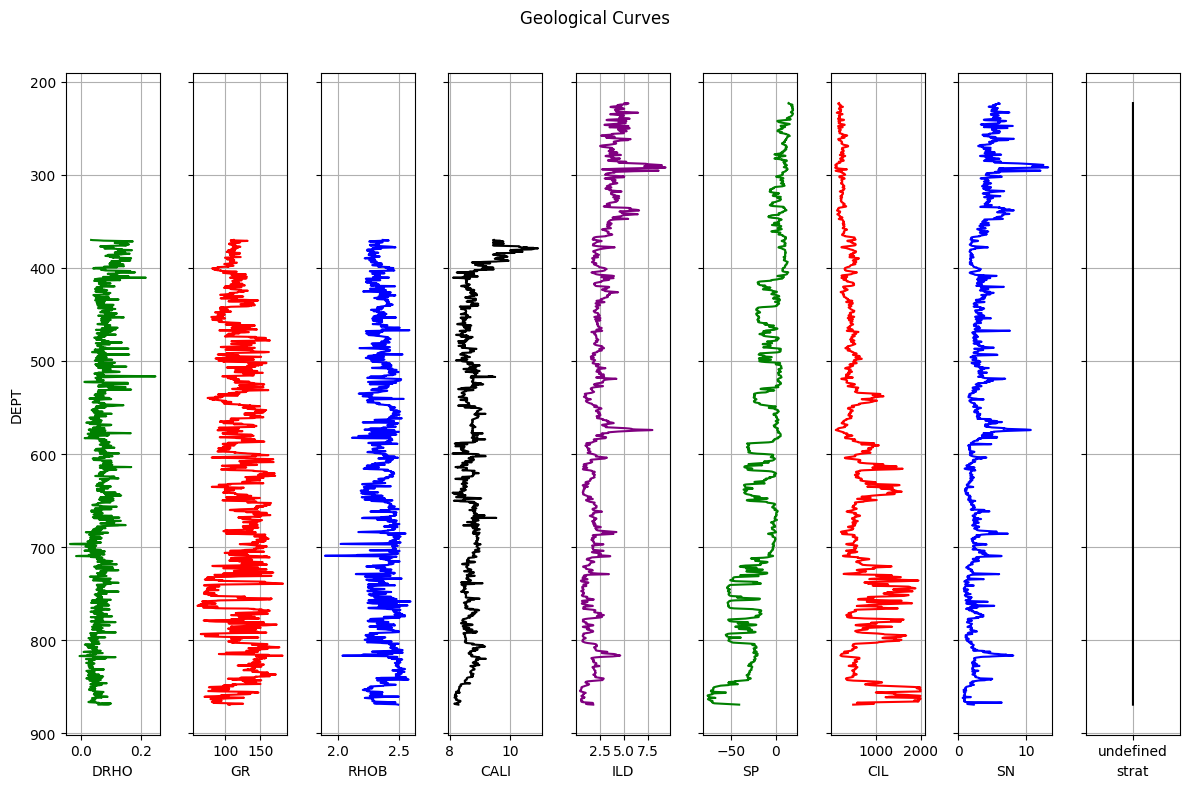

In [7]:
def plot_all_geological_curves(data, depth_column, figsize=(12, 8), title='Geological Curves'):
    """
    Function to create subplots for each column with depth as index.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the data.
        depth_column (str): The name of the depth column.
        figsize (tuple): Size of the figure.
        title (str): Title of the plot.
    """
    # Get the list of columns to plot (exclude the depth column)
    columns = [col for col in data.columns if col != depth_column]
    num_plots = len(columns)
    
    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=figsize, sharey=True)

    # Colors for the plots (cycle through colors if there are more columns than colors)
    colors = ['green', 'red', 'blue', 'black', 'purple']
    
    for i, col in enumerate(columns):
        axes[i].plot(data[col], data[depth_column], label=col, color=colors[i % len(colors)])
        axes[i].set_xlabel(col)
        axes[i].grid(True)
    
    # Set shared y-axis label and invert y-axis
    axes[0].set_ylabel(depth_column)
    axes[0].invert_yaxis()  # Invert the y-axis to have depth increase downwards

    # Set the title and adjust layout
    fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
    plt.show()

# Example usage:
# Assuming 'union' is a DataFrame with the necessary data
plot_all_geological_curves(union, 'DEPT')

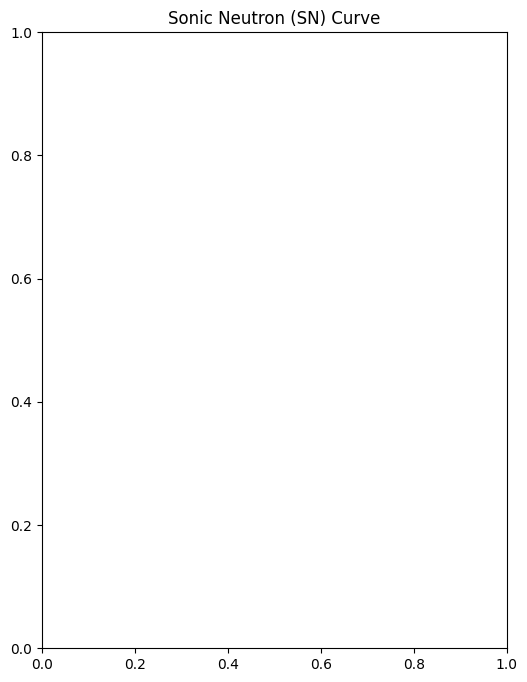

In [8]:
fig, ax = plt.subplots(figsize=(6, 8))

# Plot the SN curve


# Set the title and show the plot
ax.set_title('Sonic Neutron (SN) Curve')
plt.show()

In [9]:
df.head(100)

NameError: name 'df' is not defined